In [1]:
import zntrack
import git
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import yaml
import pandas as pd

In [2]:
repo = git.Repo()
commits = list(repo.iter_commits('HEAD'))

In [3]:
nodes = [zntrack.from_rev("CP2KSinglePoint", rev=x.hexsha) for x in commits]

2023-09-15 12:26:36,817 (DEBUG): Welcome to IPS - the Interatomic Potential Suite!


In [4]:
mses = {}
for node in nodes[:-1]:
    cutoff = yaml.safe_load(node.state.fs.read_text("config/cp2k.yaml"))["force_eval"]["DFT"]["mgrid"]["cutoff"]
    
    forces = np.reshape([x.get_forces() for x in node.atoms], -1)
    best_forces = np.reshape([x.get_forces() for x in nodes[-1].atoms], -1)
    
    mses[cutoff] = mean_squared_error(forces, best_forces)

In [5]:
mses = dict(sorted(mses.items()))

Text(0, 0.5, 'RMSE')

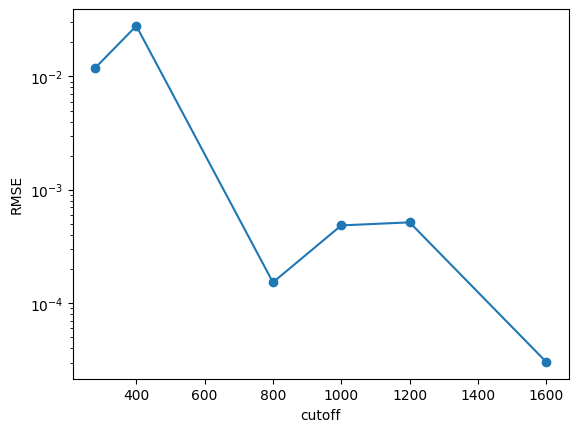

In [6]:
fig, ax = plt.subplots()
ax.plot(mses.keys(), mses.values())
ax.scatter(mses.keys(), mses.values())
ax.set_yscale("log")
ax.set_xlabel("cutoff")
ax.set_ylabel("RMSE")